In [1]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt

# Library for multi-threading
import multiprocessing
from functools import partial

from ipynb.fs.full.Functions import monopoly_experiment

# Variable Setting

This is where we can set the variables of our economic environment. We can play around with these variables.

In [2]:
# Asset parameters
payoff_high = 4
prob_high = 0.5
payoff_low = 0
prob_low = 0.5
expected_payoff = payoff_high*prob_high + payoff_low*prob_low

# Dealer parameter
lowest_ask_price = 1
highest_ask_price = 15
possible_ask_price = np.arange(lowest_ask_price, highest_ask_price+1, 1)

# Trader parameters
private_valuation_mean = 0
private_valuation_sd = 5

# Learning parameters
alpha = 0.01
beta = 0.0008
lower_q = 3
upper_q = 6

# Number of Experiments and Episode
K = 100
T = 200000

# Monopoly Situation

Here, we run the simulation in the monopoly market maker situation, where there is only one dealer in the market. 

The function that sets up the whole environment are in "Functions.ipnyb". We need to put it in a seperate file for it to run on multiple threads. However, it is important to note that we need to have all variables of our experiment defined locally for the function to used.

In [3]:
if __name__ == '__main__':
    pool = multiprocessing.Pool(processes = 10)

    # Set all other parameters other than k (random_seed) for the function "monopoly_experiment"
    func = partial(monopoly_experiment, 
                   payoff_high, prob_high, payoff_low, prob_low, lowest_ask_price, highest_ask_price, private_valuation_mean, private_valuation_sd, 
                   alpha, beta, lower_q, upper_q, T)
    
    # Run the function
    results = pool.map(func, np.arange(1,K+1,1))

 ProcessorSpawnPoolWorker-8 is processing k=100


# Results

We will now extract results into 2 different components.

First being the list of greedy prices in each experiment.

In [4]:
greedy_price_df = pd.DataFrame([item[0] for item in results]).T
greedy_price_df.columns = ["Experiment" + str(x) for x in np.arange(1,K+1,1)]
greedy_price_df

,Experiment1,Experiment2,Experiment3,Experiment4,Experiment5,Experiment6,Experiment7,Experiment8,Experiment9,Experiment10,...,Experiment91,Experiment92,Experiment93,Experiment94,Experiment95,Experiment96,Experiment97,Experiment98,Experiment99,Experiment100
0,14.0,8.0,5.0,14.0,4.0,1.0,5.0,2.0,13.0,12.0,...,11.0,10.0,7.0,9.0,10.0,4.0,7.0,13.0,9.0,11.0
1,14.0,11.0,5.0,14.0,4.0,1.0,5.0,2.0,13.0,12.0,...,9.0,10.0,7.0,9.0,10.0,4.0,7.0,13.0,9.0,11.0
2,14.0,8.0,5.0,7.0,4.0,1.0,5.0,2.0,13.0,12.0,...,9.0,10.0,7.0,11.0,10.0,4.0,7.0,15.0,9.0,11.0
3,14.0,8.0,5.0,14.0,2.0,1.0,5.0,2.0,13.0,12.0,...,11.0,6.0,4.0,9.0,10.0,4.0,7.0,15.0,15.0,11.0
4,14.0,8.0,6.0,7.0,2.0,3.0,5.0,2.0,13.0,12.0,...,9.0,6.0,4.0,9.0,10.0,2.0,2.0,15.0,9.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We also want the comparative statistics.

In [5]:
comparative_stats = pd.DataFrame({"trading_volume":[item[1] for item in results],
                                  "quoted_spread":[item[2] for item in results],
                                  "realized_spread":[item[3] for item in results]})

We can save the results locally.

In [3]:
#greedy_price_df.to_csv("./Monopoly_Simulation/monopoly_dealer_price.csv", index=False)
#comparative_stats.to_csv("./Monopoly_Simulation/monopoly_stats_delta8.csv", index=False)

greedy_price_df = pd.read_csv("./Monopoly_Simulation/monopoly_dealer_price.csv")

# Intepretation

We will be analyzing the results here with graphs.

We first look at how the average greedy price changes over episodes for the market marker. This gives us the idea of how the market maker learns from the environment.

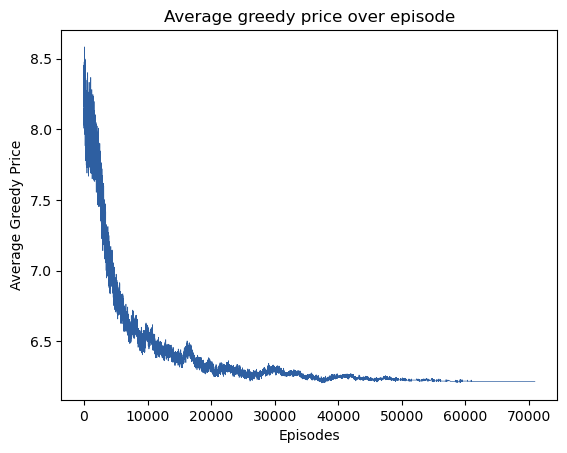

In [5]:
plt.title("Average greedy price over episode")
plt.plot(greedy_price_df.ffill().mean(axis = 1), color = "#2e5fa1", linewidth = 0.5)
plt.xlabel("Episodes")
plt.ylabel("Average Greedy Price")
plt.savefig("./Figures/Monopoly average greedy price over time.png")
plt.show()

We are also interested in the final greedy price market makers arrives in.

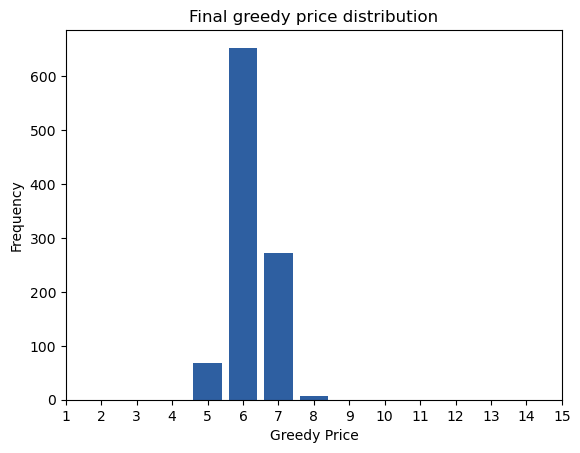

In [6]:
greedy_prices, greedy_prices_freq = np.unique(greedy_price_df.ffill(axis = 0).iloc[-1,:], return_counts = True)

plt.title("Final greedy price distribution")
plt.bar(greedy_prices, greedy_prices_freq, color = "#2e5fa1")
plt.xlabel("Greedy Price")
plt.ylabel("Frequency")
plt.xticks(np.arange(1,16,1))
plt.savefig("./Figures/Monopoly final greedy price distribution.png")
plt.show()